In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/CS231_project/gender_input_output/
! ls

/gdrive/MyDrive/CS231_project/gender_input_output
input  output


In [ ]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from PIL import Image

%matplotlib inline
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [ ]:
path = "/gdrive/MyDrive/CS231_project/gender_input_output/input/UTKFace"
path1 = "/gdrive/MyDrive/CS231_project/gender_input_output/input/UTKFace1"
path2 = "/gdrive/MyDrive/Project5_AgeGenderEmotion_Detection/1.2_gender_input_output/input/UTKFace"
pixels = []
age = []
gender = []

In [ ]:
i=0
for img in os.listdir(path2):
  i=i+1
  print(i)
  genders = img.split("_")[1]
  img = cv2.imread(str(path2)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(100,100))
  pixels.append(np.array(img))
  gender.append(np.array(genders))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
1

In [ ]:
pixels = np.array(pixels)
gender = np.array(gender,np.uint64)

In [ ]:
print(len(pixels))
print(len(gender))

23708
23708


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pixels, gender, test_size=0.2, random_state=100)

In [ ]:
print(len(x_train))
print(len(x_test))

18966
4742


In [ ]:
input = Input(shape = (100,100,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(2,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam",loss=["sparse_categorical_crossentropy"],metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                             

In [ ]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path='/gdrive/MyDrive/CS231_project/gender_input_output/output/gender_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor='val_accuracy',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
save = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[callback_list],use_multiprocessing=True, workers=-1)

Epoch 1/30


ValueError: ignored

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

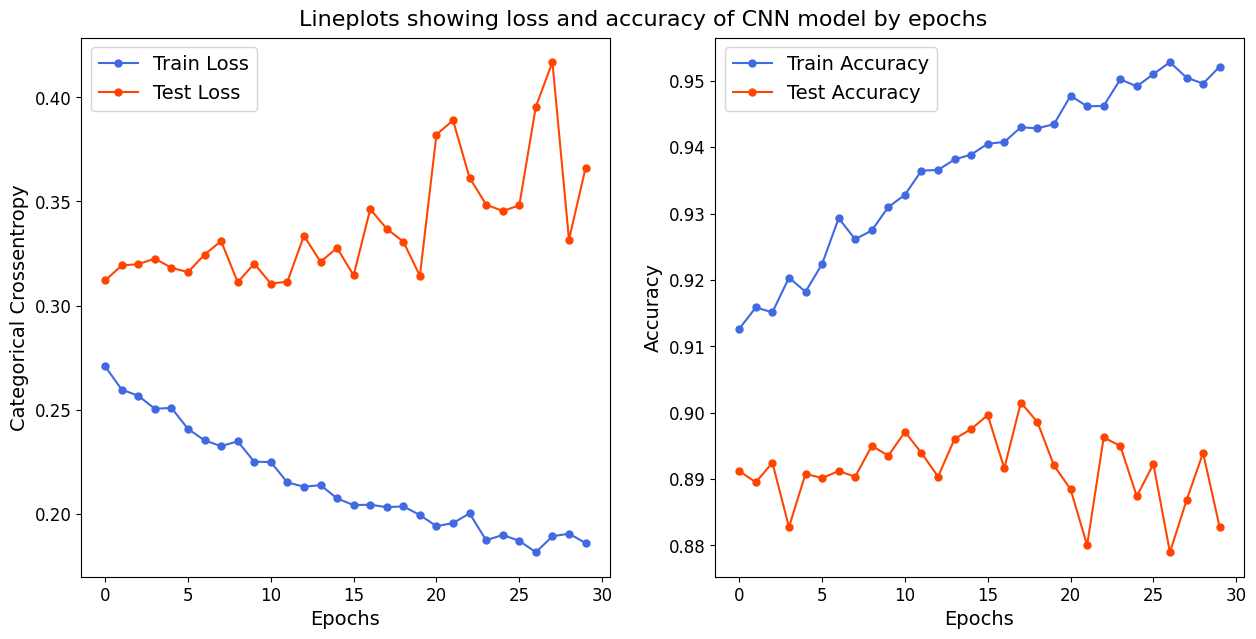

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Định nghĩa các callbacks
model_path = '/gdrive/MyDrive/CS231_project/gender_input_output/output/gender_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True,
                               save_weights_only=True, mode='auto', save_freq='epoch')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Sử dụng callbacks trong quá trình đào tạo
callback_list = [checkpointer, early_stopping]
save = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, callbacks=callback_list)


Epoch 1/20
593/593 [==============================] - ETA: 0s - loss: 0.9366 - accuracy: 0.7909
Epoch 1: val_loss improved from inf to 0.50734, saving model to /gdrive/MyDrive/CS231_project/gender_input_output/output/gender_model.h5
593/593 [==============================] - 23s 25ms/step - loss: 0.9366 - accuracy: 0.7909 - val_loss: 0.5073 - val_accuracy: 0.8600
Epoch 2/20
593/593 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.8572
Epoch 2: val_loss improved from 0.50734 to 0.44532, saving model to /gdrive/MyDrive/CS231_project/gender_input_output/output/gender_model.h5
593/593 [==============================] - 13s 22ms/step - loss: 0.4728 - accuracy: 0.8572 - val_loss: 0.4453 - val_accuracy: 0.8629
Epoch 3/20
591/593 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8689
Epoch 3: val_loss improved from 0.44532 to 0.39349, saving model to /gdrive/MyDrive/CS231_project/gender_input_output/output/gender_model.h5
593/593 [==================

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 32)      320       
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 activation (Activation)     (None, 255, 255, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                             

In [ ]:
export_dir='/gdrive/MyDrive/CS231_project/gender_input_output/output/gender_model.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 32)      320       
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 activation (Activation)     (None, 255, 255, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                             

In [ ]:
gender_ranges = ['male', 'female']

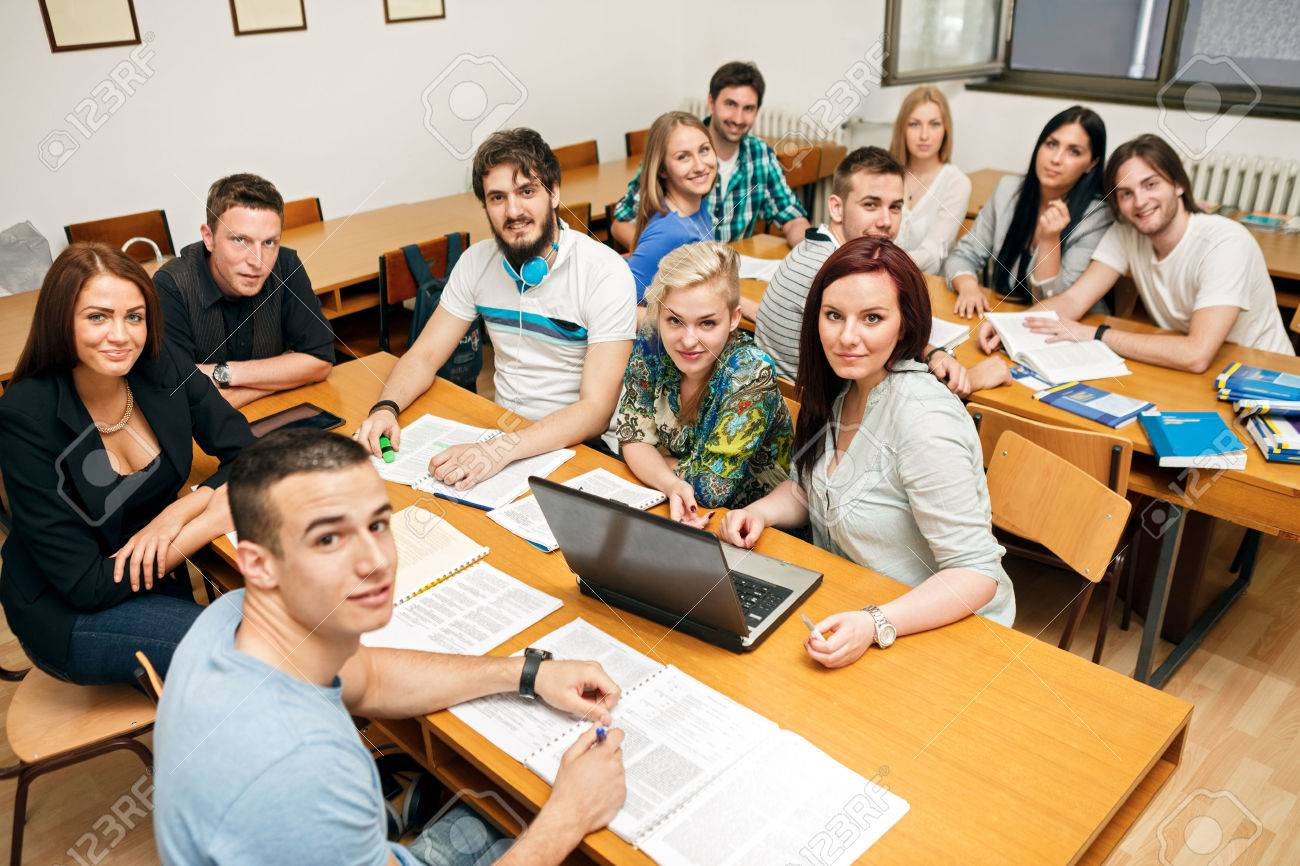

In [ ]:
img_path = "/gdrive/MyDrive/CS231_project/test/4.jpg"
from IPython.display import Image
pil_img = Image(filename=img_path)
display(pil_img)

1/1 [==============================] - 0s 21ms/step
1: male
1/1 [==============================] - 0s 16ms/step
2: female
1/1 [==============================] - 0s 18ms/step
3: female
1/1 [==============================] - 0s 16ms/step
4: female
1/1 [==============================] - 0s 20ms/step
5: female
1/1 [==============================] - 0s 19ms/step
6: male
1/1 [==============================] - 0s 18ms/step
7: female
1/1 [==============================] - 0s 20ms/step
8: female
1/1 [==============================] - 0s 22ms/step
9: female
1/1 [==============================] - 0s 19ms/step
10: female
1/1 [==============================] - 0s 19ms/step
11: female
1/1 [==============================] - 0s 19ms/step
12: female


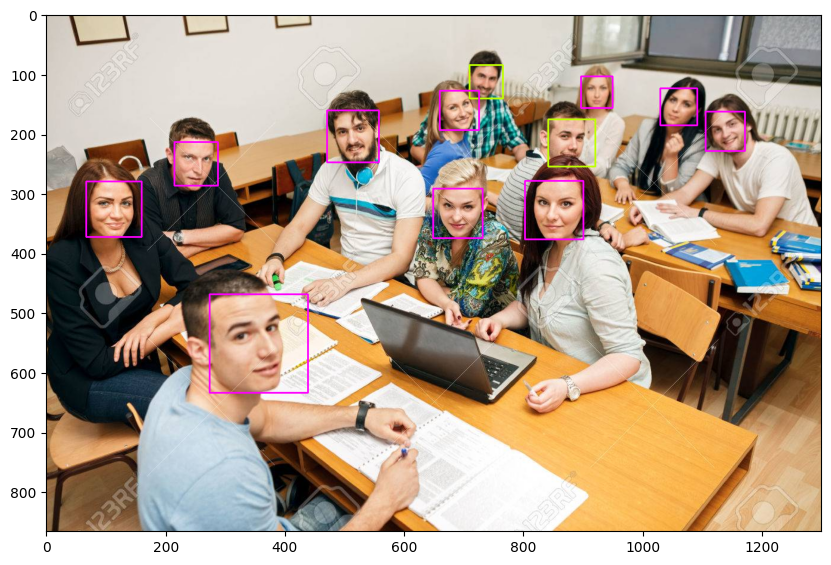

In [ ]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/gdrive/MyDrive/Project5_AgeGenderEmotion_Detection/1.4_test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.2, 10)
i = 0

for (x,y,w,h) in faces:
  i = i+1
  #cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  gender_img = cv2.resize(img_gray, (100,100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(model.predict(gender_input))]

  if output_gender == "male":
    rect_color = (0, 255, 191)
  else:
    rect_color = (255, 0, 255)

  cv2.rectangle(test_image, (x, y), (x + w, y + h), (rect_color), 2)
  output_str = str(i) + ": "+  output_gender
  print(output_str)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))